## Python量化交易
## 1.使用真实股票数据

- Python版本：4.8
- 需要用到的包：pandas_datareader
```shell
pip install pandas_datareader --upgrade
pip install yfinace
```


`Yahoo`的API需要进行`override`

### 1.1 获取股票数据

In [7]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import datetime

yf.pdr_override()

# 获取2024年1月1日-2024年3月8日的特斯拉股票
data = pdr.get_data_yahoo('TSLA', start='2024-1-1', end='2024-3-8')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600
2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300
2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400
2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600


### 1.2 简单处理
计算每日股价的变化情况

In [8]:
# diff字段来表示股价的变化情况
data['diff'] = data['Close'].diff()

data.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200,NaN
2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600,-9.970001
2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300,-0.520004
2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400,-0.439987
2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600,2.959991


### 1.3 设计简单的交易策略
最简单的交易策略：如果每日股价下跌，就在下一个交易日开盘前进行买入；否则，则卖出；

创建一个新的字段`Signal`，如果`diff`字段大于0，则`Signal`标记为1；如果`diff`字段小于或等于0，则`Signal`。

In [9]:
import numpy as np
# 创建交易信号Signal
# 如果diff大于0，Signal为1；反之，为0；
data['signal'] = np.where(data['diff'] > 0, 1, 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,diff,signal
Date,,,,,,,,
2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200,NaN,0
2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600,-9.970001,0
2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300,-0.520004,0
2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400,-0.439987,0
2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600,2.959991,1


### 1.4 交易信号可视化


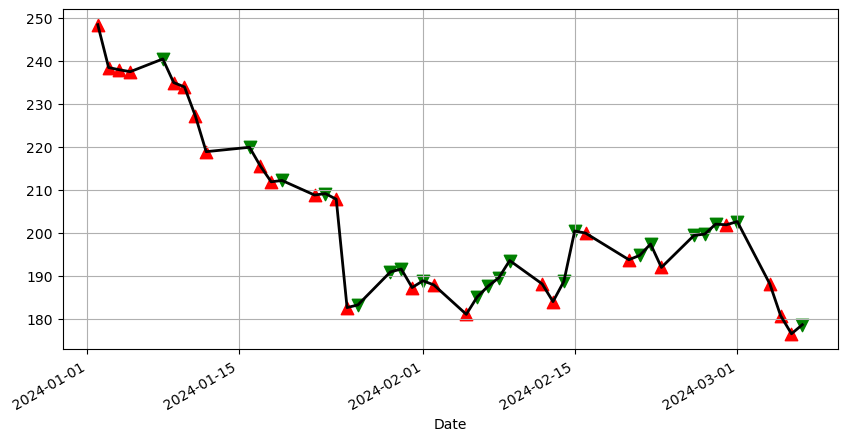

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# 绘制每天的收盘价
data['Close'].plot(linewidth=2, color='k', grid=True)

# 如果当天股价上涨，标出卖出信号，用倒三角表示
plt.scatter(data['Close'].loc[data.signal==1].index, 
           data['Close'][data.signal==1], marker='v', s=80, c='g')

# 如果当天股价下跌，标买入信号，用正三角表示
plt.scatter(data['Close'].loc[data.signal==0].index, 
           data['Close'][data.signal==0], marker='^', s=80, c='r')



plt.show()

在上图中，倒三角代表着卖出，正三角代表着买入